# Speckle pattern, intensity histograms and detector noise

Import basic routines

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import sys

Import speckle related routines

In [44]:
sys.path.insert(0, '../scripts/')
from speckle_routines import *

parameters for the speckle pattern

In [45]:
nx,ny = 100,120 # size of array x,y
kbar = 0.1   # mean photon density (photons per pixel)
modes = 1     # number of modes in the speckle pattern
specklesize=4 # speckle size in pixel units

Intensity histogram of the speckle pattern 

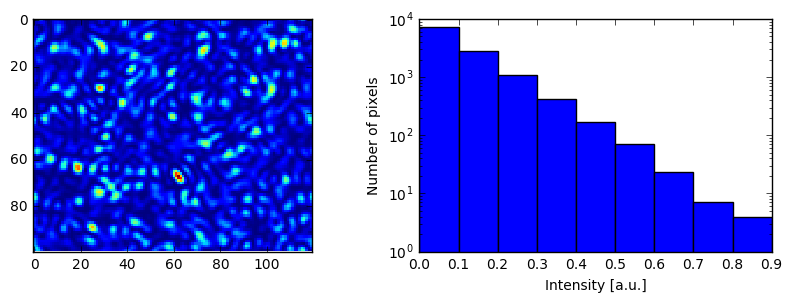

In [46]:
speckle = model_speckles_modes([nx,ny],specklesize,modes)
speckle /=max(speckle.flatten()) # normalise

bi,bf,db = 0.0,1.,0.1 #starting bin, final bin, bin size
hy,hx = np.histogram(speckle,bins = np.arange(bi,bf,db)) 

plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.imshow(speckle,interpolation='none')

plt.subplot(1,2,2)
plt.bar(hx[:-1],hy,width = db)
plt.yscale('log',nonposy='clip')
plt.xlabel('Intensity [a.u.]')
plt.ylabel('Number of pixels')
plt.show()


Intensity histogram of the speckle pattern with shot noise

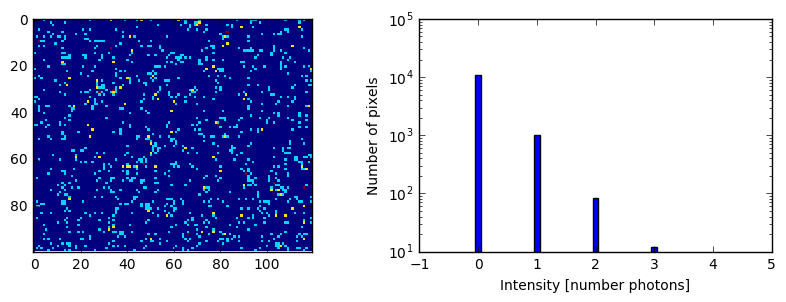

In [47]:
speckle = simulate_speckles_with_shot_noise([nx,ny],modes,specklesize,kbar)
bi,bf,db = 0.0,5.,0.1
hy,hx = np.histogram(speckle,bins = np.arange(bi,bf,db)) 

plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.imshow(speckle,interpolation='none')

plt.subplot(1,2,2)
plt.bar(hx[:-1]-db/2.,hy,width = db)
plt.yscale('log',nonposy='clip')
plt.xlabel('Intensity [number photons]')
plt.ylabel('Number of pixels')
plt.show()

adding white (gaussian) noise

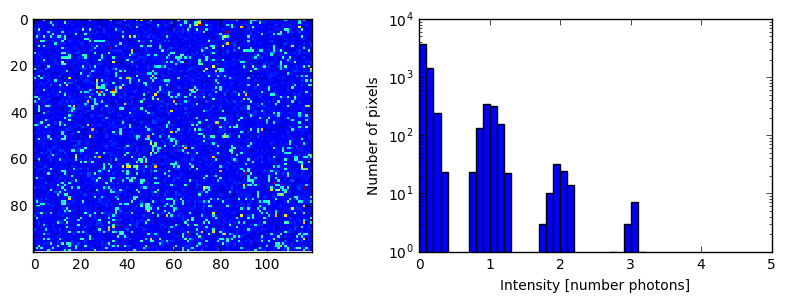

In [48]:
noise_mu,noise_sigma = 0.,0.1
noise = simulate_gaussian_noise([nx,ny],noise_mu,noise_sigma)

speckle_noise = speckle + noise

bi,bf,db = 0.0,5.,0.1
hy,hx = np.histogram(speckle_noise,bins = np.arange(bi,bf,db)) 

plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.imshow(speckle_noise,interpolation='none')

plt.subplot(1,2,2)
plt.bar(hx[:-1],hy,width = db)
plt.yscale('log',nonposy='clip')
plt.xlabel('Intensity [number photons]')
plt.ylabel('Number of pixels')
plt.show()

Charge sharing (gaussian intensity bleeding) between pixels 

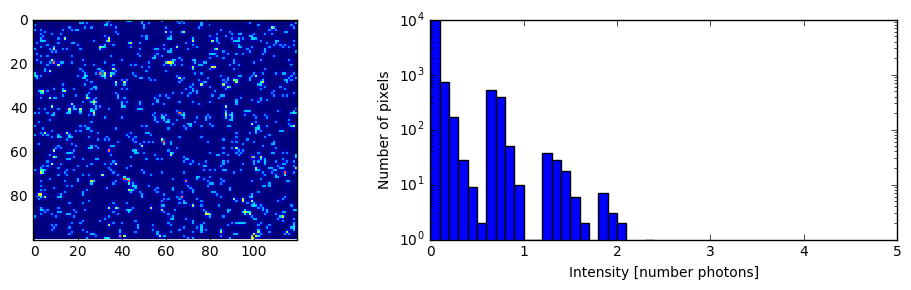

In [49]:
blur_sigma = 0.5
speckle_blur = simulate_charge_sharing([nx,ny],modes,specklesize,kbar,sigma=blur_sigma)

bi,bf,db = 0.0,5.,0.1
hy,hx = np.histogram(speckle_blur,bins = np.arange(bi,bf,db)) 

plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.imshow(speckle_blur,interpolation='none')

plt.subplot(1,2,2)
plt.bar(hx[:-1],hy,width = db)
plt.yscale('log',nonposy='clip')
plt.xlabel('Intensity [number photons]')
plt.ylabel('Number of pixels')

plt.tight_layout()
plt.show()


Combination of chagre sharing and white noise

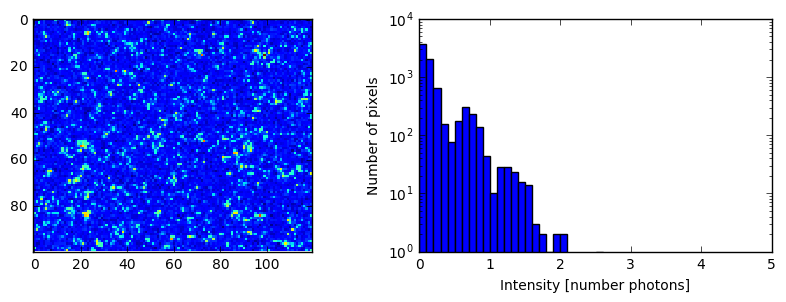

In [50]:
blur_sigma = 0.5
speckle = simulate_charge_sharing([nx,ny],modes,specklesize,kbar,sigma=blur_sigma)

noise_mu,noise_sigma = 0.,0.1
noise = simulate_gaussian_noise([nx,ny],noise_mu,noise_sigma)
speckle_noise = speckle + noise

bi,bf,db = 0.0,5.,0.1
hy,hx = np.histogram(speckle_noise,bins = np.arange(bi,bf,db)) 

plt.figure(figsize = [10,3])

plt.subplot(1,2,1)
plt.imshow(speckle_noise,interpolation='none')

plt.subplot(1,2,2)
plt.bar(hx[:-1],hy,width = db)
plt.yscale('log',nonposy='clip')
plt.xlabel('Intensity [number photons]')
plt.ylabel('Number of pixels')
plt.show()